The procedures and data used in this notebook were adapted from procedure used by various participants of the kaggle competition. I appreciate all the knowledge derived from these people. 

The link to the competiion is available here: 

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

# Baseline feature transformation `

In [ ]:
import pandas as pd

# Read the first 50 lines of the CSV file
df = pd.read_csv('creditcard.csv', nrows=50)

# Display the first 50 lines
print(df)


# Section 2.2. EDA

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Good No Null Values!
df.isnull().sum().max()

0

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [9]:
!pip install sns

  Preparing metadata (setup.py) ... done
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2639 sha256=b546ba0cbabfcefe8b9cc57018f6054dc3d60a84fa4e0424fbf90043e7470c41
  Stored in directory: /Users/paulagbaje/Library/Caches/pip/wheels/76/1a/47/c3b6a8b9d3ae47b1488f4be13c86586327c07e0ac1bb5b3337
Successfully built sns


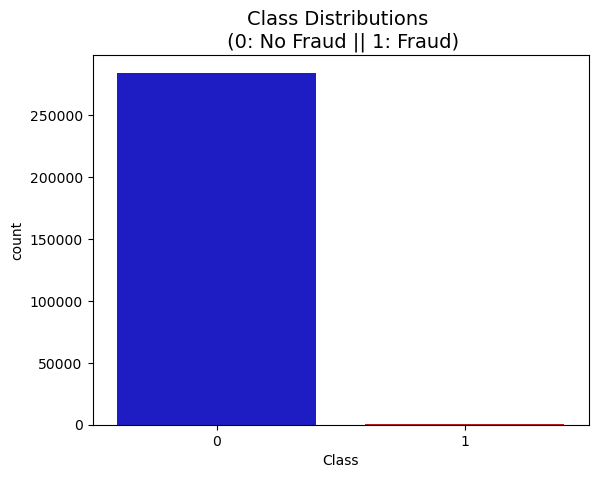

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


In [11]:
# Distribution of Non PCA part of the data 

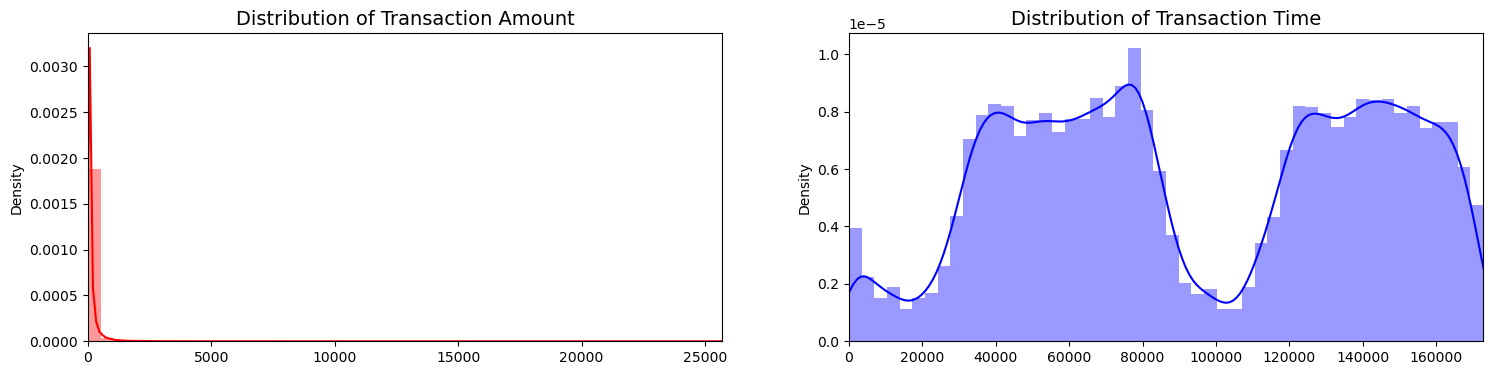

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

amount_plot = sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

time_plot = sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


## 2.2.1. Sampling and Scaling 

We need to convert the columns into scaled samples to match columns


In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

scaled_amount = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
scaled_time = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df['scaled_amount'] = scaled_amount
df['scaled_time'] = scaled_time

df.drop(['Time', 'Amount'], axis=1, inplace=True)


In [14]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(1, 'scaled_amount', scaled_amount)
df.insert(2, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()


,V1,scaled_amount,scaled_time,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,1.783274,-0.994983,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,-0.269825,-0.994983,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,4.983721,-0.994972,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,1.418291,-0.994972,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.670579,-0.994960,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Here we split the data before undersampling and oversmapling so we can test on the original dataframe. 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    stratified_X_train, stratified_X_test = X.iloc[train_index], X.iloc[test_index]
    stratified_y_train, stratified_y_test = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersampled data that's why I am using stratified to distinguish and to not overwrite these variables.
# stratified_X_train, stratified_X_test, stratified_y_train, stratified_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

# Turn into an array
stratified_X_train = stratified_X_train.values
stratified_X_test = stratified_X_test.values
stratified_y_train = stratified_y_train.values
stratified_y_test = stratified_y_test.values

# See if both the train and test label distributions are similarly distributed
train_unique_label, train_counts_label = np.unique(stratified_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(stratified_y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label / len(stratified_y_train))
print(test_counts_label / len(stratified_y_test))


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### 2.2.2 Undersampling

In [16]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_samples = df.loc[df['Class'] == 1]
non_fraud_samples = df.loc[df['Class'] == 0][:492]

balanced_df = pd.concat([fraud_samples, non_fraud_samples])

# Shuffle dataframe rows
balanced_df = balanced_df.sample(frac=1, random_state=42)

balanced_df.head()


,V1,scaled_amount,scaled_time,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
30983,-0.291891,0.455250,-0.570131,0.597984,1.410785,-0.176577,-0.568222,-0.634780,0.626592,-0.227919,...,-0.478899,-0.450791,-0.891515,0.021783,0.319337,-0.083496,-0.615144,-0.042517,0.023692,0
6903,-2.535852,-0.293440,-0.890588,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,...,0.408704,0.716720,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1
16924,-1.085647,-0.293579,-0.662555,-0.796376,1.130079,0.841694,1.692641,-1.058281,-0.644139,0.195729,...,0.391606,0.016121,-0.371267,0.424895,-0.450105,-1.068547,0.138761,0.140835,0.224789,0
30100,-3.218952,0.539370,-0.574737,2.708535,-3.263042,1.361866,-1.645776,-1.852982,-3.069958,-1.796876,...,0.571654,1.807877,-0.890421,-0.325814,0.123040,-0.093014,0.232106,-0.310519,-0.745295,1
274382,-5.766879,-0.307413,0.955004,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,...,2.493224,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,1


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


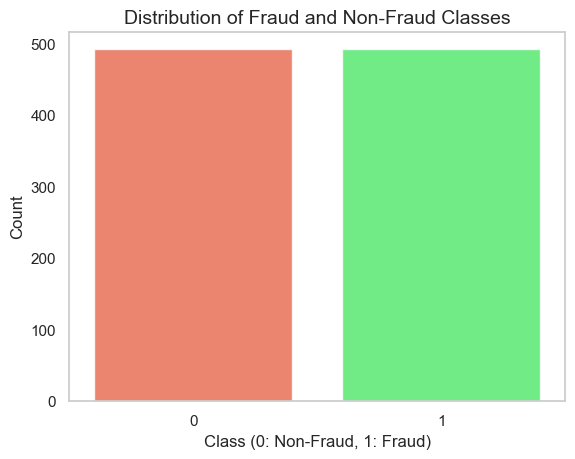

In [22]:
print('Distribution of the Classes in the subsample dataset')
print(balanced_df['Class'].value_counts() / len(balanced_df))

sns.countplot(x='Class', data=balanced_df, palette=["#FF5733", "#33FF57"], alpha=0.8)
plt.title('Distribution of Fraud and Non-Fraud Classes', fontsize=14)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)  # Removing grid lines
plt.show()


### 2.2.3 Correlation Matrix 

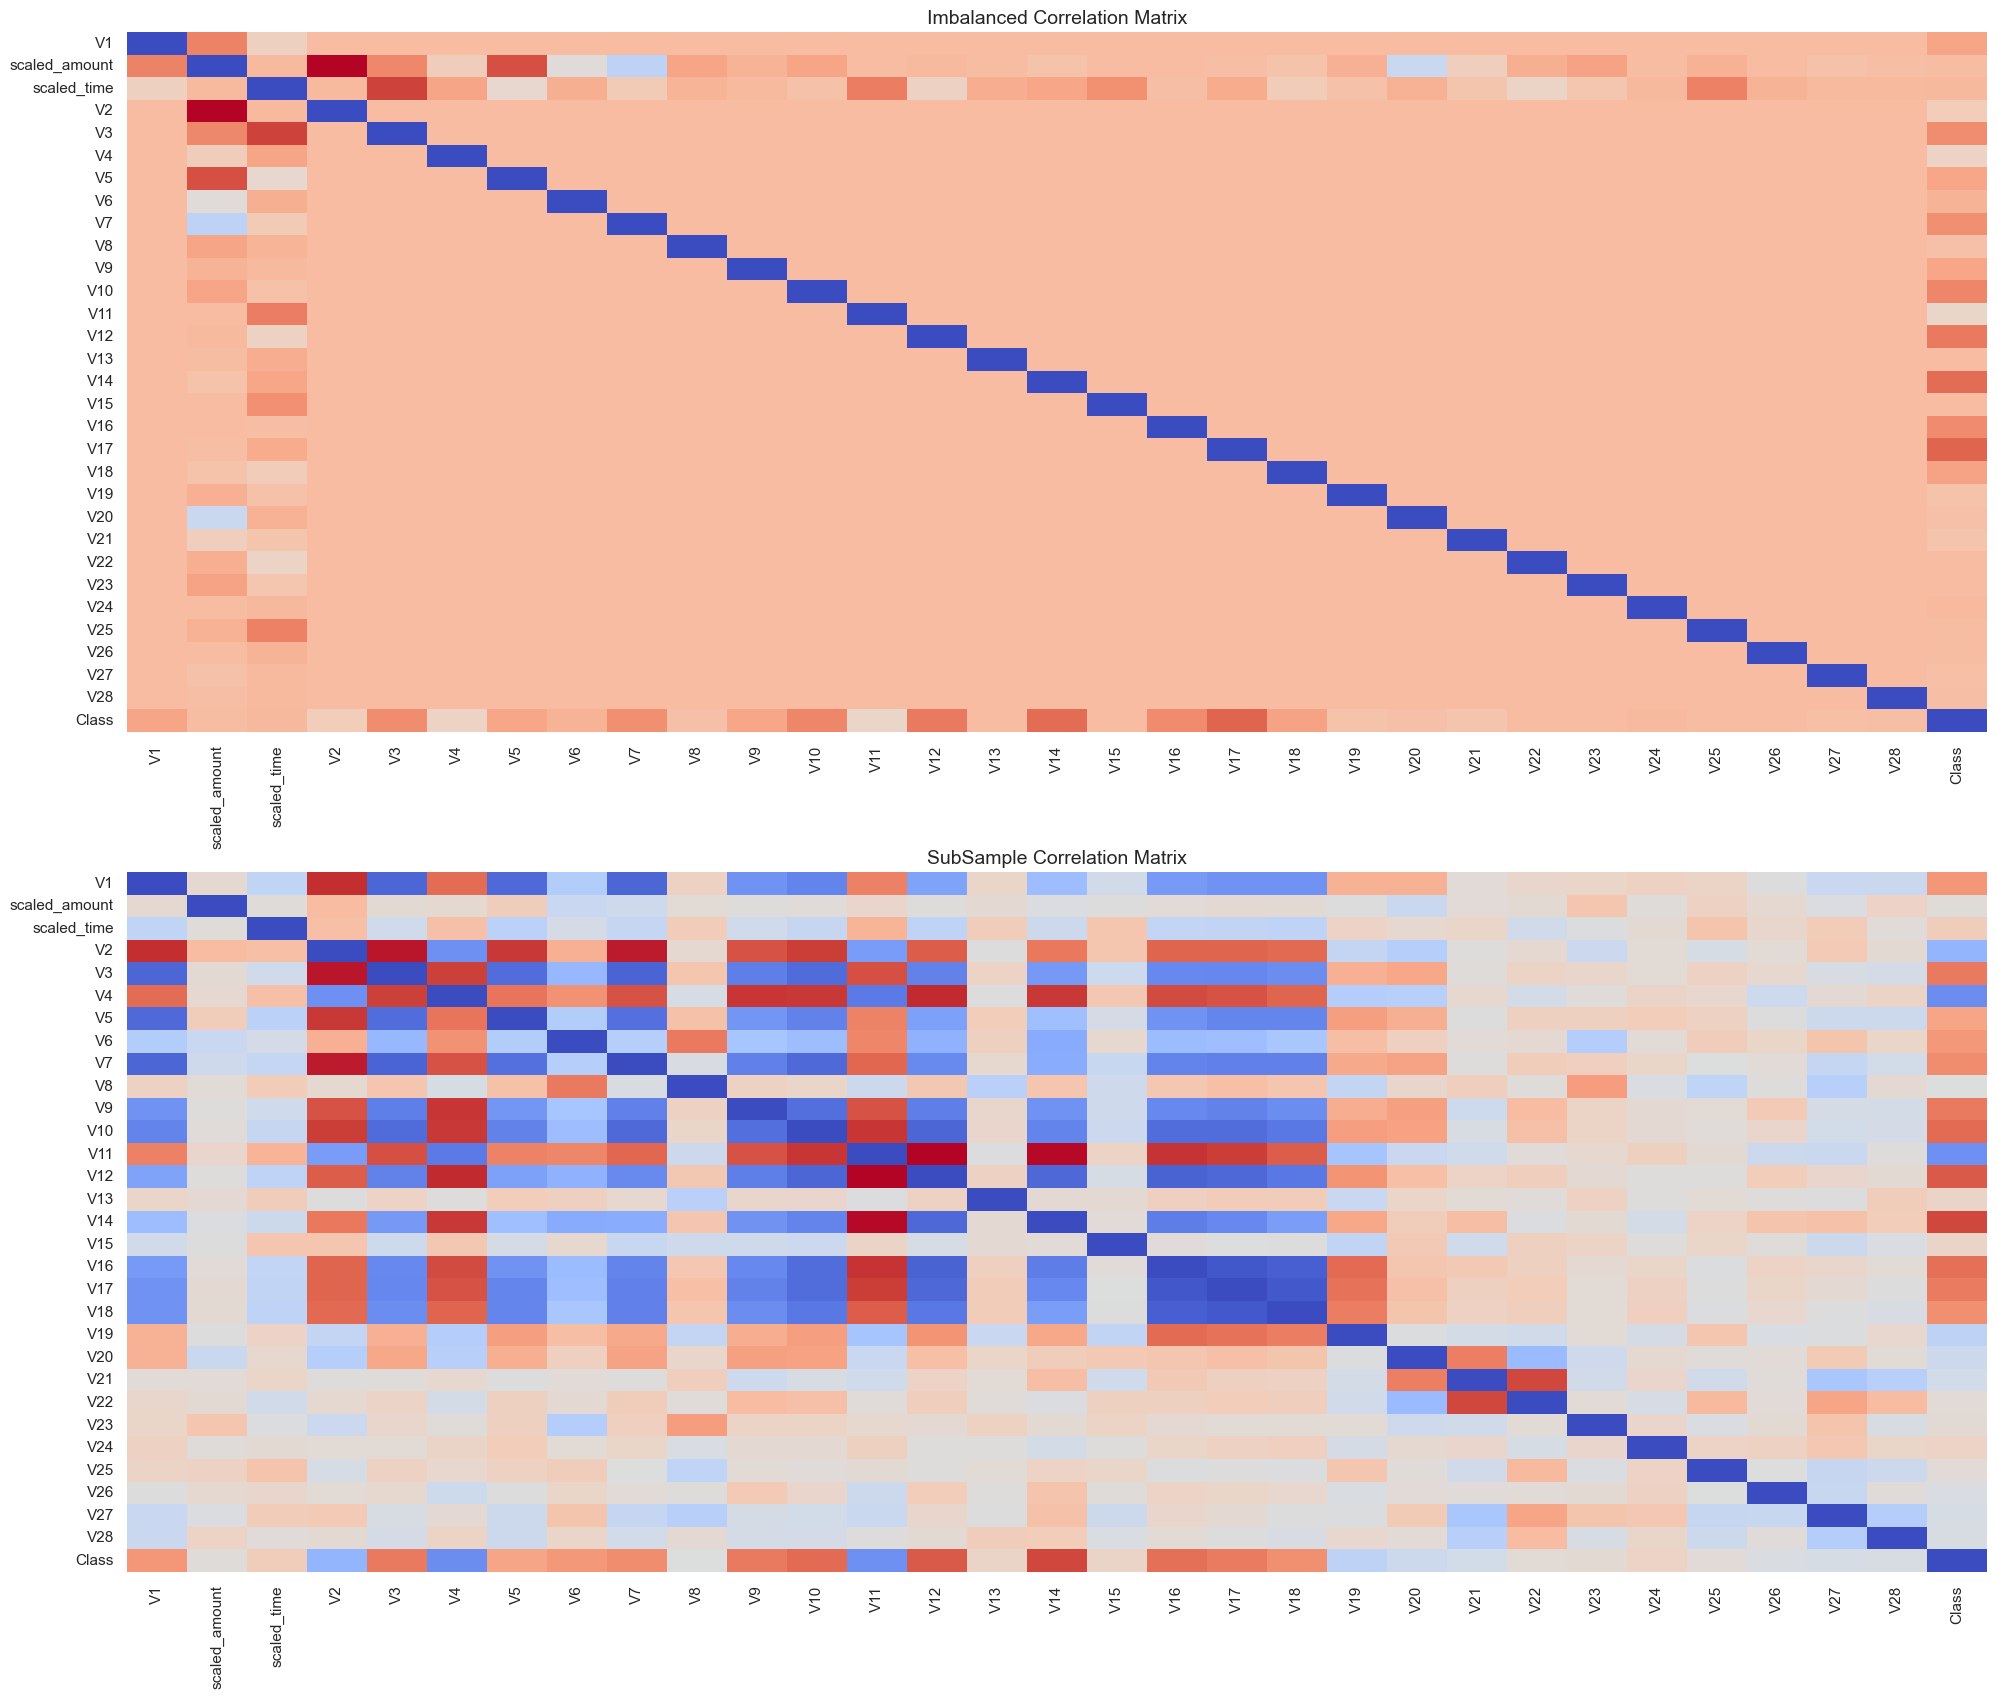

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20}, ax=ax1, cbar=False)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

# Subsample DataFrame
sub_sample_corr = balanced_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size': 20}, ax=ax2, cbar=False)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)

# Remove grid lines
ax1.grid(False)
ax2.grid(False)

plt.show()


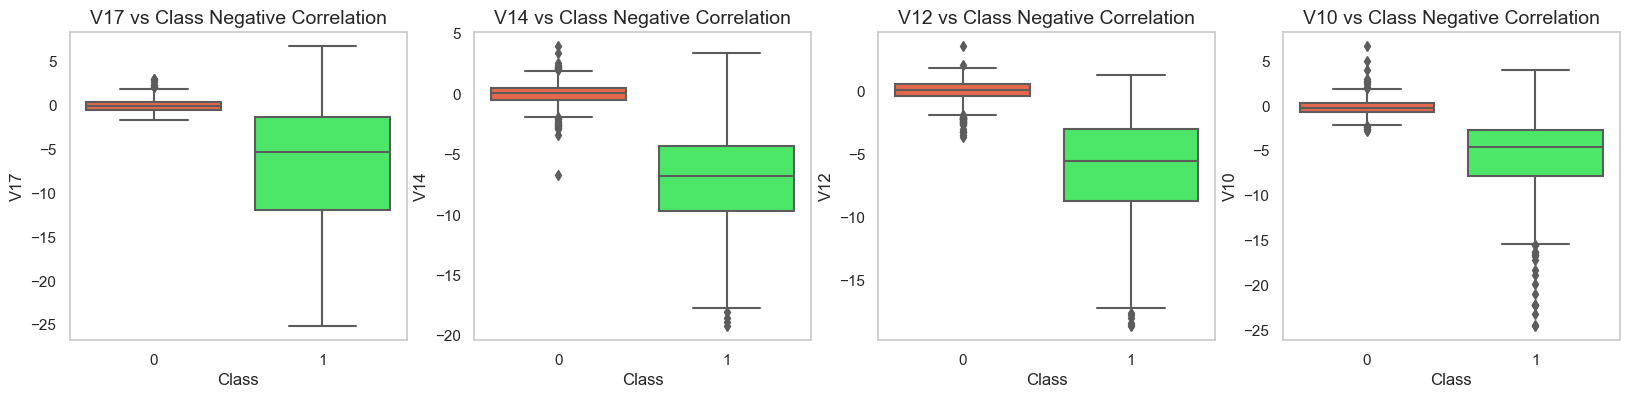

In [24]:
f, axes = plt.subplots(ncols=4, figsize=(20, 4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=balanced_df, palette=["#FF5733", "#33FF57"], ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation', fontsize=14)

sns.boxplot(x="Class", y="V14", data=balanced_df, palette=["#FF5733", "#33FF57"], ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation', fontsize=14)

sns.boxplot(x="Class", y="V12", data=balanced_df, palette=["#FF5733", "#33FF57"], ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation', fontsize=14)

sns.boxplot(x="Class", y="V10", data=balanced_df, palette=["#FF5733", "#33FF57"], ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation', fontsize=14)

# Remove grid lines
for ax in axes:
    ax.grid(False)

plt.show()


Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

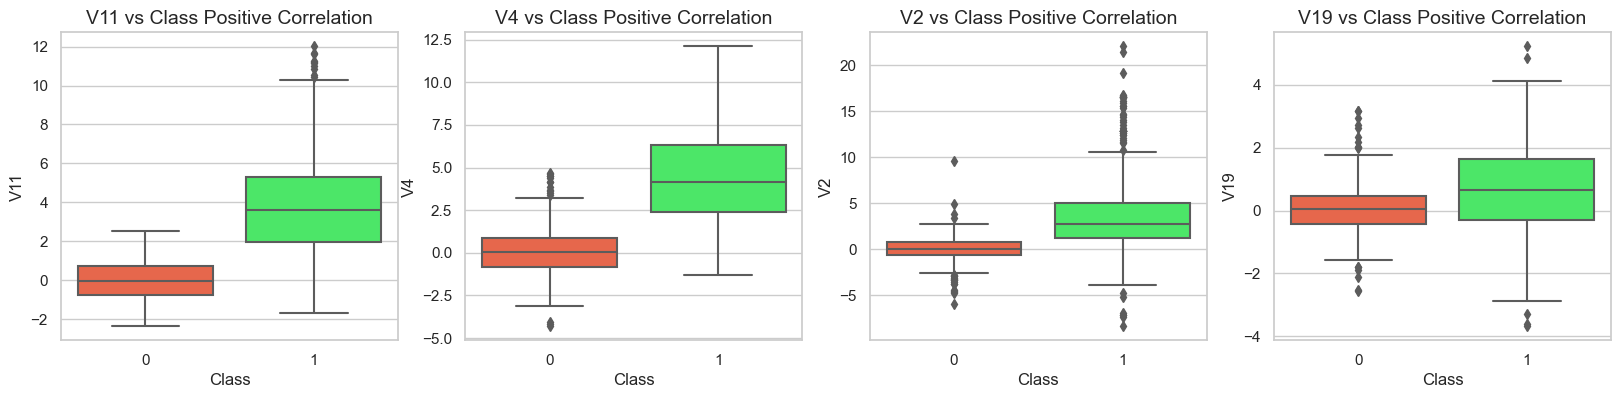

In [25]:
f, axes = plt.subplots(ncols=4, figsize=(20, 4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=balanced_df, palette=["#FF5733", "#33FF57"], ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation', fontsize=14)

sns.boxplot(x="Class", y="V4", data=balanced_df, palette=["#FF5733", "#33FF57"], ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation', fontsize=14)

sns.boxplot(x="Class", y="V2", data=balanced_df, palette=["#FF5733", "#33FF57"], ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation', fontsize=14)

sns.boxplot(x="Class", y="V19", data=balanced_df, palette=["#FF5733", "#33FF57"], ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation', fontsize=14)


### 2.2.4. Anomaly Detection

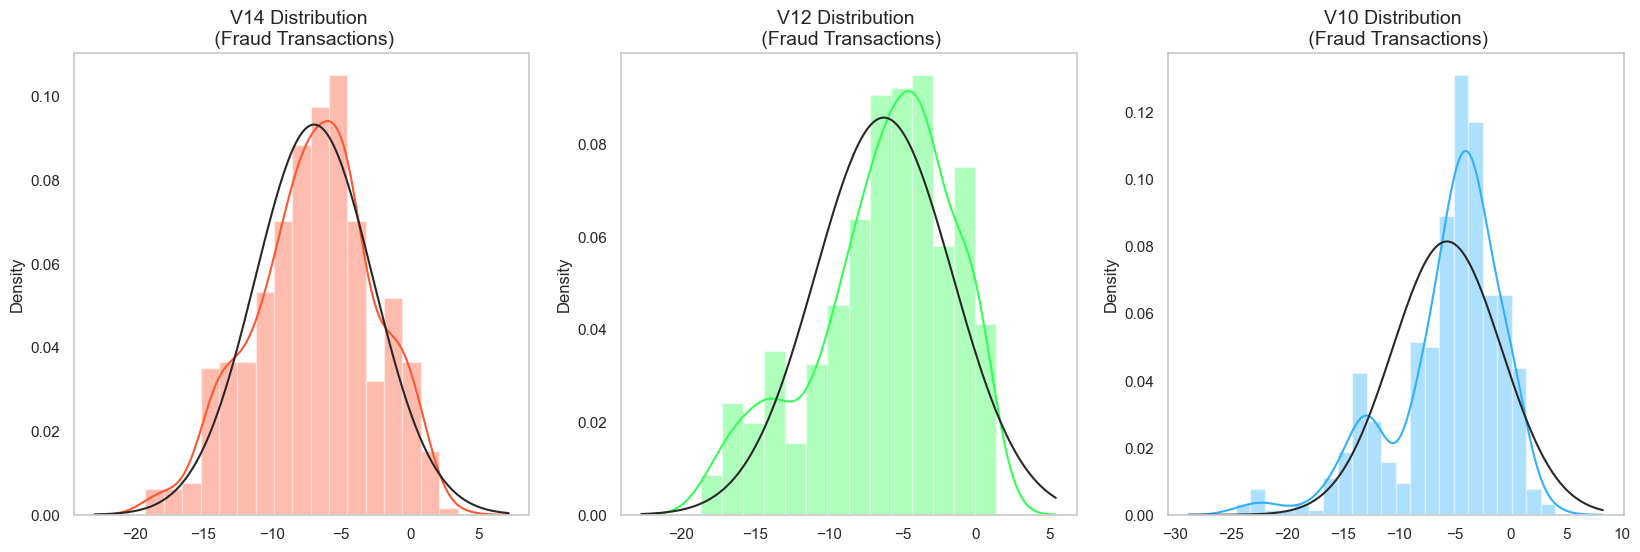

In [30]:
# Here we visualize the distribution of some features 

from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_fraud_dist = balanced_df['V14'].loc[balanced_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='#FF5733')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = balanced_df['V12'].loc[balanced_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='#33FF57')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = balanced_df['V10'].loc[balanced_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='#33AFFF')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

# Remove grid lines
for ax in [ax1, ax2, ax3]:
    ax.grid(False)

plt.show()


In [32]:
### Identigying and eliminating extreme outliers

v14_fraud_values = balanced_df['V14'].loc[balanced_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud_values, 25), np.percentile(v14_fraud_values, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers_v14 = [x for x in v14_fraud_values if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers_v14)))
print('V14 outliers:{}'.format(outliers_v14))

balanced_df = balanced_df.drop(balanced_df[(balanced_df['V14'] > v14_upper) | (balanced_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud_values = balanced_df['V12'].loc[balanced_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud_values, 25), np.percentile(v12_fraud_values, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers_v12 = [x for x in v12_fraud_values if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers_v12))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers_v12)))
balanced_df = balanced_df.drop(balanced_df[(balanced_df['V12'] > v12_upper) | (balanced_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(balanced_df)))
print('----' * 44)

# Removing outliers V10 Feature
v10_fraud_values = balanced_df['V10'].loc[balanced_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud_values, 25), np.percentile(v10_fraud_values, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers_v10 = [x for x in v10_fraud_values if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers_v10))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers_v10)))
balanced_df = balanced_df.drop(balanced_df[(balanced_df['V10'] > v10_upper) | (balanced_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(balanced_df)))


Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.8220867423816, -18.4937733551053, -19.2143254902614, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.0475965708216, -18.6837146333443, -18.5536970096458, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-22.1870885620007, -20.949191

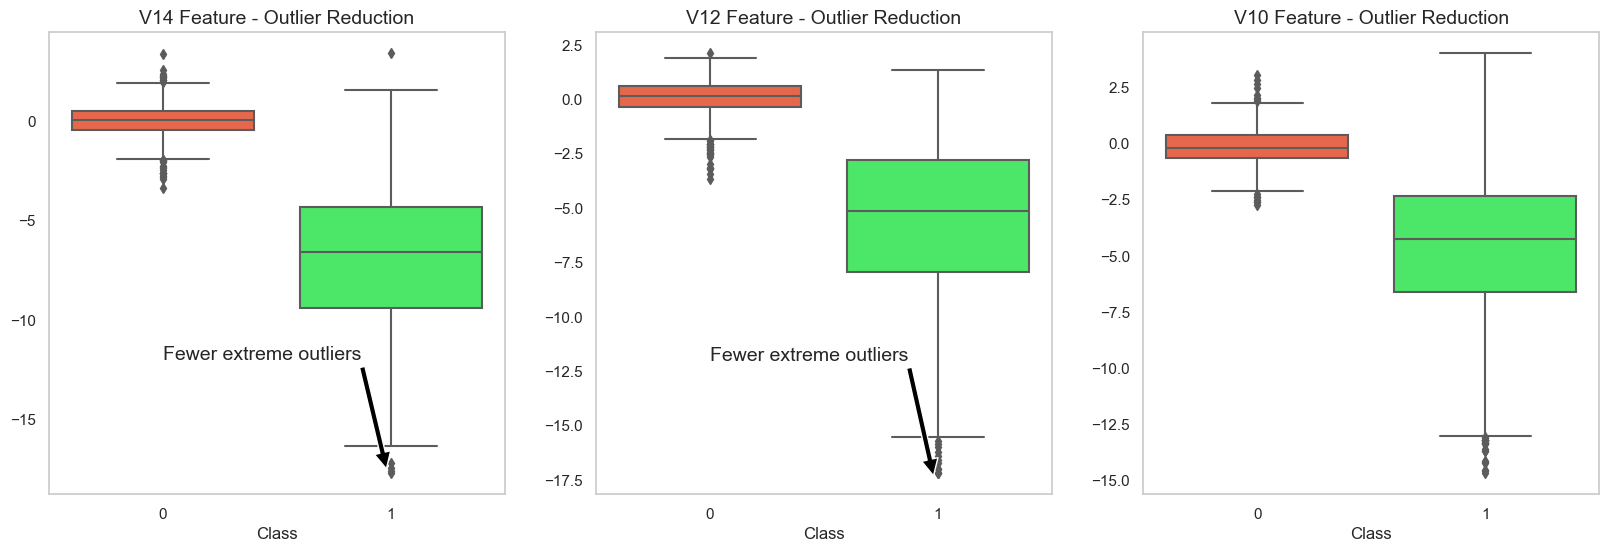

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

colors = ['#FF5733', '#33FF57']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=balanced_df, ax=ax1, palette=colors)
ax1.set_title("V14 Feature - Outlier Reduction", fontsize=14)
ax1.annotate('Fewer extreme outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V12
sns.boxplot(x="Class", y="V12", data=balanced_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature - Outlier Reduction", fontsize=14)
ax2.annotate('Fewer extreme outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=balanced_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature - Outlier Reduction", fontsize=14)
ax3.annotate('Fewer extreme outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Customize y-axis labels
for ax in [ax1, ax2, ax3]:
    ax.set_ylabel('')

# Remove grid lines
for ax in [ax1, ax2, ax3]:
    ax.grid(False)

plt.show()


### 2.2.5. Using Clustering to Understand Seperation of Data 

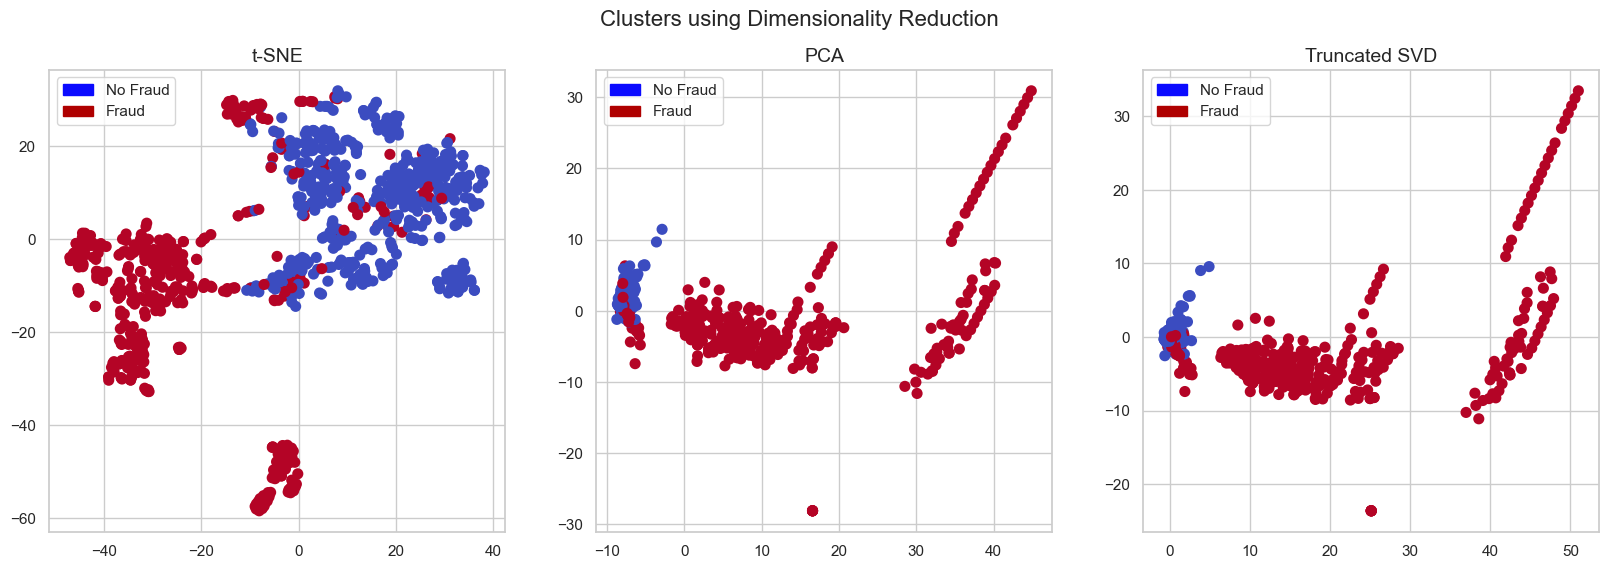

In [37]:
# Data from the balanced dataset
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

# T-SNE Implementation
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# PCA Implementation
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# colors
colors = ['#FF5733', '#33FF57']

# scatter plot titles
f.suptitle('Clusters using Dimensionality Reduction', fontsize=16)

# labels for legend
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=y, cmap='coolwarm', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=y, cmap='coolwarm', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=y, cmap='coolwarm', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()


# 3.	Preliminary Model Training with Under Sampling  

## 3.1.	Comparing Classifiers

In [38]:
from sklearn.model_selection import cross_val_score

# Undersampling before cross-validating (prone to overfit)
X_balanced = balanced_df.drop('Class', axis=1)
y_balanced = balanced_df['Class']

# Our data is already scaled, we should split our training and test sets
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Convert to arrays for classification algorithms
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Let's implement simple classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}


for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"{classifier_name}: Training score: {round(training_score.mean() * 100, 2)}%")


Logistic Regression: Training score: 94.05%
KNearest: Training score: 93.39%
Support Vector Classifier: Training score: 93.26%
Decision Tree Classifier: Training score: 91.27%


In [39]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# K Nearest Neighbors
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# Decision Tree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
               "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_


In [40]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.18%
Knears Neighbors Cross Validation Score 93.78%
Support Vector Classifier Cross Validation Score 93.92%
DecisionTree Classifier Cross Validation Score 93.39%


In [41]:
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain, undersample_ytrain)
    undersample_prediction = undersample_model.predict(undersample_Xtest)
    
    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtest, undersample_ytest))
    undersample_precision.append(precision_score(undersample_ytest, undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytest, undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytest, undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytest, undersample_prediction))
    
print("Mean Accuracy: {:.2f}%".format(np.mean(undersample_accuracy) * 100))
print("Mean Precision: {:.2f}%".format(np.mean(undersample_precision) * 100))
print("Mean Recall: {:.2f}%".format(np.mean(undersample_recall) * 100))
print("Mean F1 Score: {:.2f}%".format(np.mean(undersample_f1) * 100))
print("Mean AUC: {:.2f}%".format(np.mean(undersample_auc) * 100))


Train: [ 56959  56960  56961 ... 284804 284805 284806] Test: [    0     1     2 ... 57368 58851 58942]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56959  56960  56961 ... 113921 113922 113923]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113924 113925 113926 ... 173167 173173 173663]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170880 170881 170882 ... 227843 227844 227856]
Train: [     0      1      2 ... 227843 227844 227856] Test: [227845 227846 227847 ... 284804 284805 284806]
Mean Accuracy: 57.48%
Mean Precision: 0.38%
Mean Recall: 93.50%
Mean F1 Score: 0.77%
Mean AUC: 75.46%


In [47]:
# Let's Plot Learning Curves
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    
    # First Estimator
    train_sizes1, train_scores1, test_scores1 = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean1 = np.mean(train_scores1, axis=1)
    train_scores_std1 = np.std(train_scores1, axis=1)
    test_scores_mean1 = np.mean(test_scores1, axis=1)
    test_scores_std1 = np.std(test_scores1, axis=1)
    ax1.fill_between(train_sizes1, train_scores_mean1 - train_scores_std1,
                     train_scores_mean1 + train_scores_std1, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes1, test_scores_mean1 - test_scores_std1,
                     test_scores_mean1 + test_scores_std1, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes1, train_scores_mean1, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes1, test_scores_mean1, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes2, train_scores2, test_scores2 = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean2 = np.mean(train_scores2, axis=1)
    train_scores_std2 = np.std(train_scores2, axis=1)
    test_scores_mean2 = np.mean(test_scores2, axis=1)
    test_scores_std2 = np.std(test_scores2, axis=1)
    ax2.fill_between(train_sizes2, train_scores_mean2 - train_scores_std2,
                     train_scores_mean2 + train_scores_std2, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes2, test_scores_mean2 - test_scores_std2,
                     test_scores_mean2 + test_scores_std2, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes2, train_scores_mean2, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes2, test_scores_mean2, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("K Nearest Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes3, train_scores3, test_scores3 = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean3 = np.mean(train_scores3, axis=1)
    train_scores_std3 = np.std(train_scores3, axis=1)
    test_scores_mean3 = np.mean(test_scores3, axis=1)
    test_scores_std3 = np.std(test_scores3, axis=1)
    ax3.fill_between(train_sizes3, train_scores_mean3 - train_scores_std3,
                     train_scores_mean3 + train_scores_std3, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes3, test_scores_mean3 - test_scores_std3,
                     test_scores_mean3 + test_scores_std3, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes3, train_scores_mean3, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes3, test_scores_mean3, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes4, train_scores4, test_scores4 = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean4 = np.mean(train_scores4, axis=1)
    train_scores_std4 = np.std(train_scores4, axis=1)
    test_scores_mean4 = np.mean(test_scores4, axis=1)
    test_scores_std4 = np.std(test_scores4, axis=1)
    ax4.fill_between(train_sizes4, train_scores_mean4 - train_scores_std4,
                     train_scores_mean4 + train_scores_std4, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes4, test_scores_mean4 - test_scores_std4,
                     test_scores_mean4 + test_scores_std4, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes4, train_scores_mean4, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes4, test_scores_mean4, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt


/Users/paulagbaje/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paulagbaje/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

<module 'matplotlib.pyplot' from '/Users/paulagbaje/anaconda3/envs/homl3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

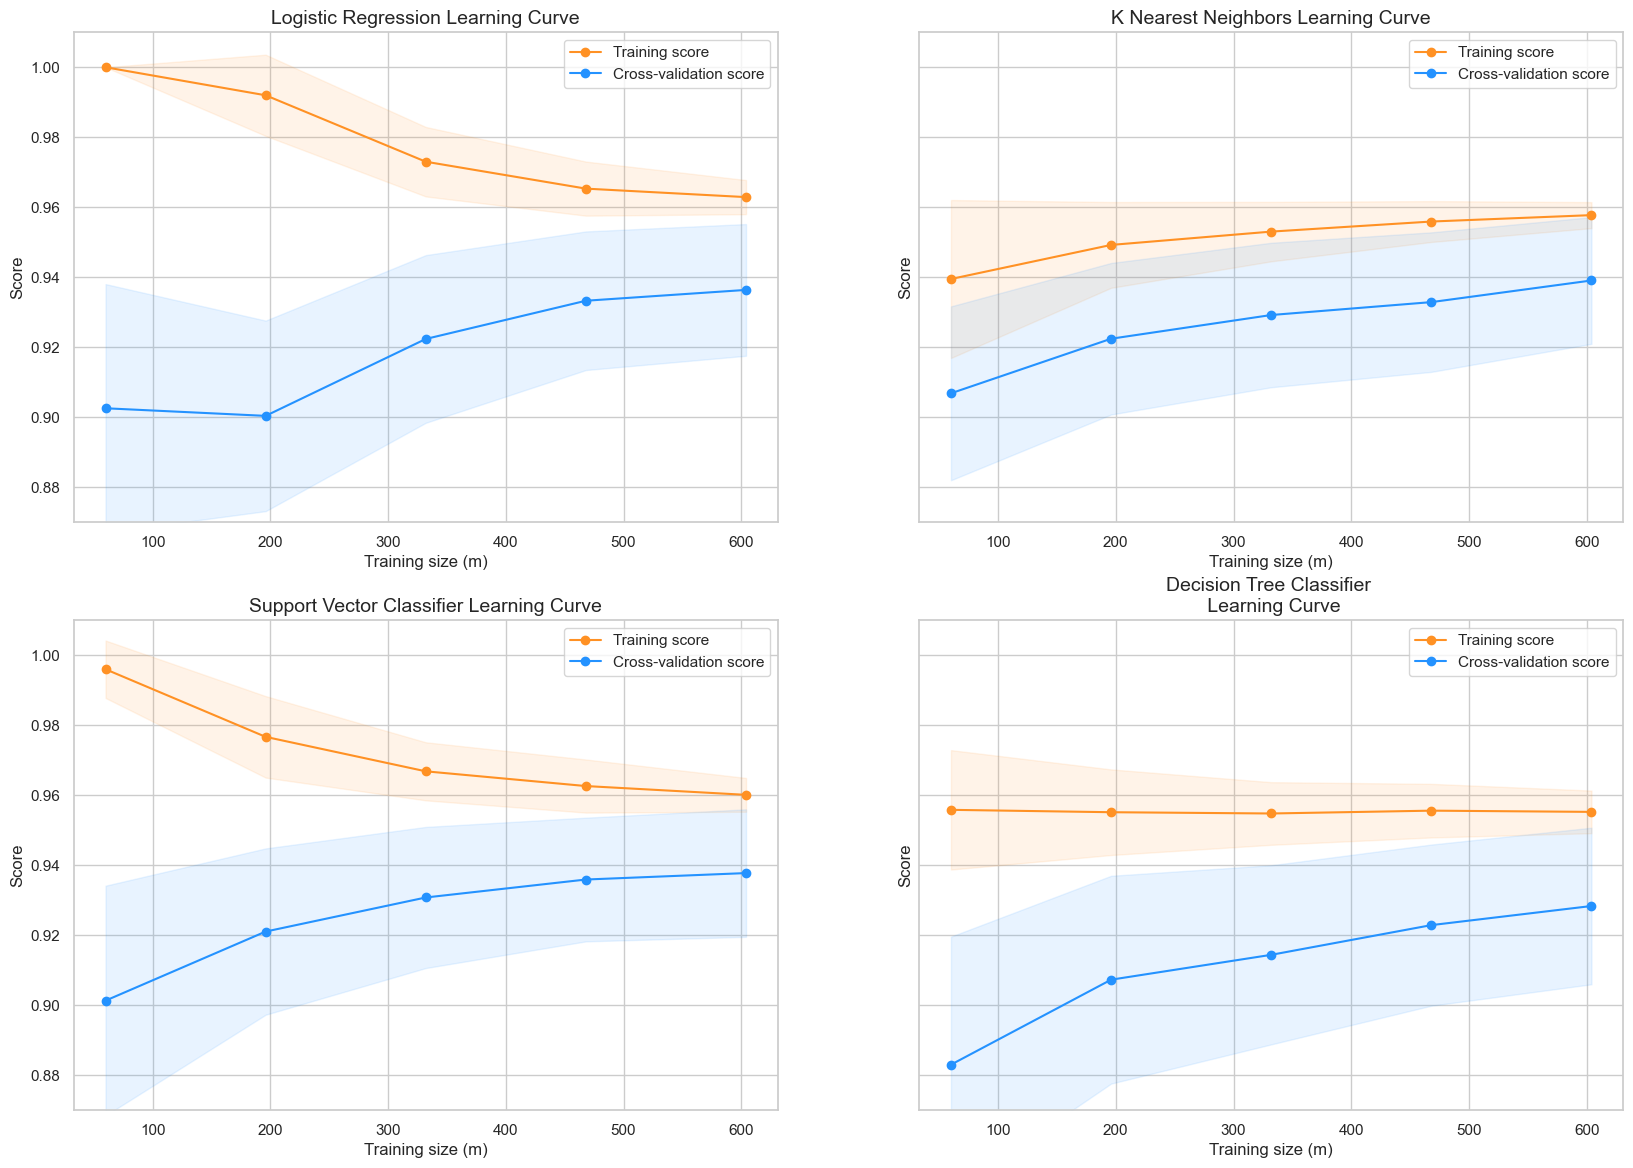

In [48]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [49]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')


## 3.2. Metrics

In [50]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Cross-validation predictions
log_reg_predictions = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")
knears_predictions = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_predictions = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")
tree_predictions = cross_val_predict(tree_clf, X_train, y_train, cv=5)


In [52]:
from sklearn.metrics import roc_auc_score

# Logistic Regression
log_reg_auc = roc_auc_score(y_train, log_reg_predictions)

# K Neighbors
knears_auc = roc_auc_score(y_train, knears_predictions)

# Support Vector Classifier
svc_auc = roc_auc_score(y_train, svc_predictions)

# Decision Tree Classifier
tree_auc = roc_auc_score(y_train, tree_predictions)

print('Logistic Regression: ', log_reg_auc)
print('KNears Neighbors: ', knears_auc)
print('Support Vector Classifier: ', svc_auc)
print('Decision Tree Classifier: ', tree_auc)


Logistic Regression:  0.972416545870885
KNears Neighbors:  0.9365664586878427
Support Vector Classifier:  0.9716882698542748
Decision Tree Classifier:  0.9331316568979643


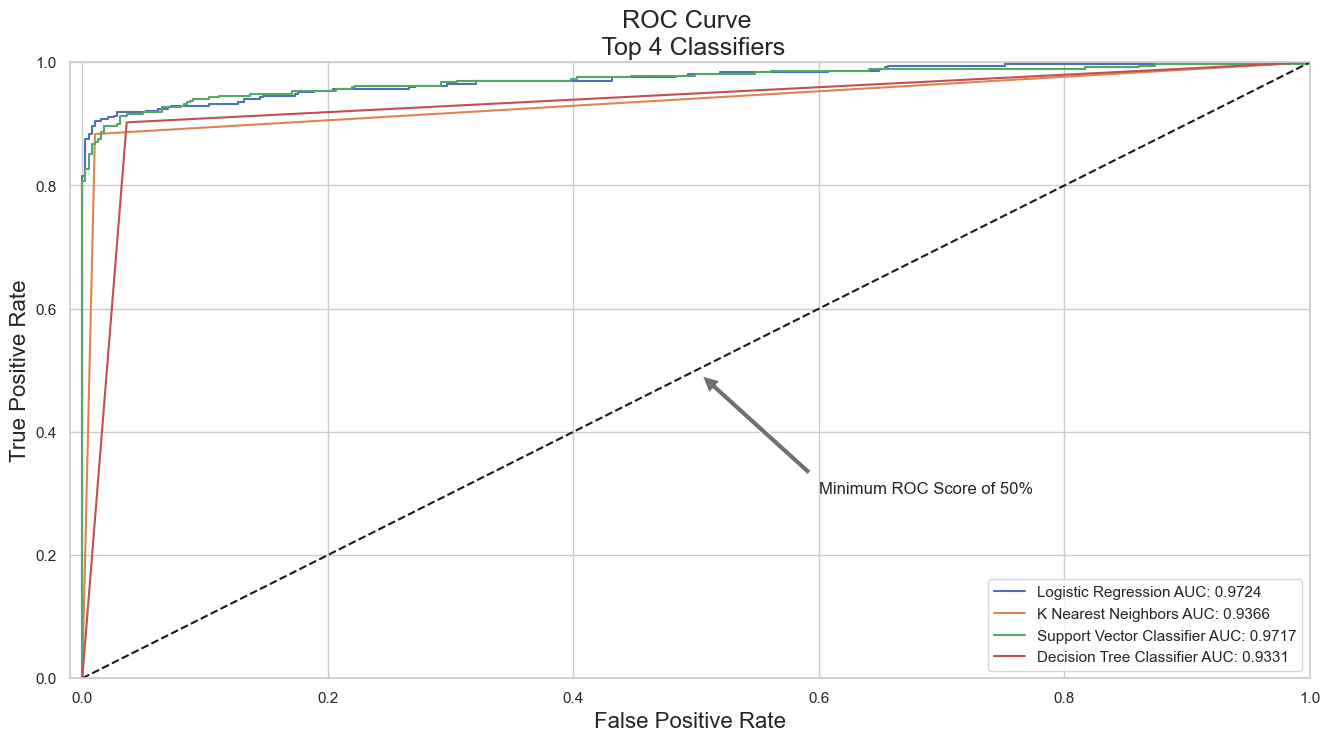

In [56]:
# Compute ROC curves
logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(y_train, log_reg_predictions)
knears_fpr, knears_tpr, knears_thresholds = roc_curve(y_train, knears_predictions)
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_train, svc_predictions)
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_train, tree_predictions)

# Define function to plot ROC curves for multiple classifiers
def plot_roc_curve(logistic_fpr, logistic_tpr, knears_fpr, knears_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(logistic_fpr, logistic_tpr, label='Logistic Regression AUC: {:.4f}'.format(roc_auc_score(y_train, log_reg_predictions)))
    plt.plot(knears_fpr, knears_tpr, label='K Nearest Neighbors AUC: {:.4f}'.format(roc_auc_score(y_train, knears_predictions)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier AUC: {:.4f}'.format(roc_auc_score(y_train, svc_predictions)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier AUC: {:.4f}'.format(roc_auc_score(y_train, tree_predictions)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50%', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

# Plot ROC curves
plot_roc_curve(logistic_fpr, logistic_tpr, knears_fpr, knears_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()


In [57]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.96
Precision Score: 0.64
F1 Score: 0.77
Accuracy Score: 0.72
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.57
Precision Score: 0.00
Recall Score: 0.93
F1 Score: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


In [58]:
undersample_accuracy

[0.610354271268565,
 0.6561567360696605,
 0.5569951370235775,
 0.548234757114517,
 0.5021857060093748]

In [60]:
under

Pipeline(steps=[('nearmiss', NearMiss(sampling_strategy='majority')),
                ('logisticregression', LogisticRegression(C=100))])

##  3.3. Oversampling Using Smote 

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

# Lists to append the scores for averaging
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(X_train, y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_train[train], y_train[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_train[test])
    
    accuracy_lst.append(pipeline.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)


Length of X (train): 756 | Length of y (train): 756
Length of X (test): 190 | Length of y (test): 190
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9378180550714535
precision: 0.9740428412167542
recall: 0.8970751573491299
f1: 0.9334656839183773
---------------------------------------------------------------------------------------------------------------------------------------


In [63]:
class_labels = ['No Fraud', 'Fraud']
predicted_labels = best_est.predict(X_test)
print(classification_report(y_test, predicted_labels, target_names=class_labels))


              precision    recall  f1-score   support

    No Fraud       0.89      0.97      0.93       102
       Fraud       0.96      0.86      0.91        88

    accuracy                           0.92       190
   macro avg       0.93      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190



In [72]:
predicted_scores = best_est.decision_function(stratified_X_test)


In [73]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(stratified_y_test, predicted_scores)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.79


Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.79')

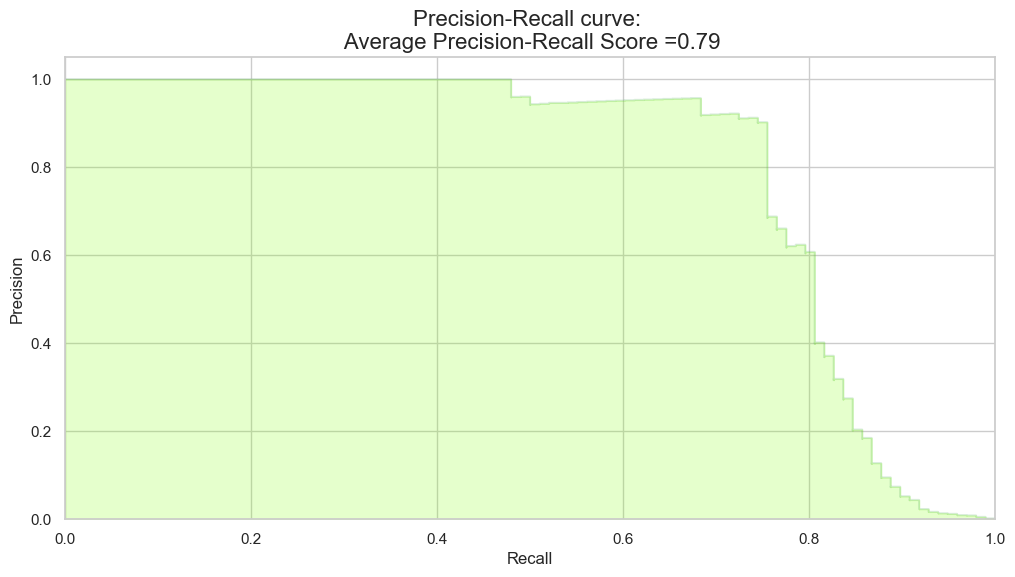

In [74]:
from sklearn.metrics import precision_recall_curve
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(stratified_y_test, predicted_scores)

plt.step(recall, precision, color='g', alpha=0.2,  # Changed color to green
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#7FFF00')  # Changed color to lime green

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)  # Changed title


In [76]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_smote_train, y_smote_train = smote.fit_resample(stratified_X_train, stratified_y_train)


In [77]:
# Implement GridSearchCV and the other models
rand_log_reg.fit(X_smote_train, y_smote_train)
log_reg_sm = rand_log_reg.best_estimator_
log_reg_sm.fit(X_smote_train, y_smote_train)


LogisticRegression(C=0.001)

### 3.2.1 Metrics

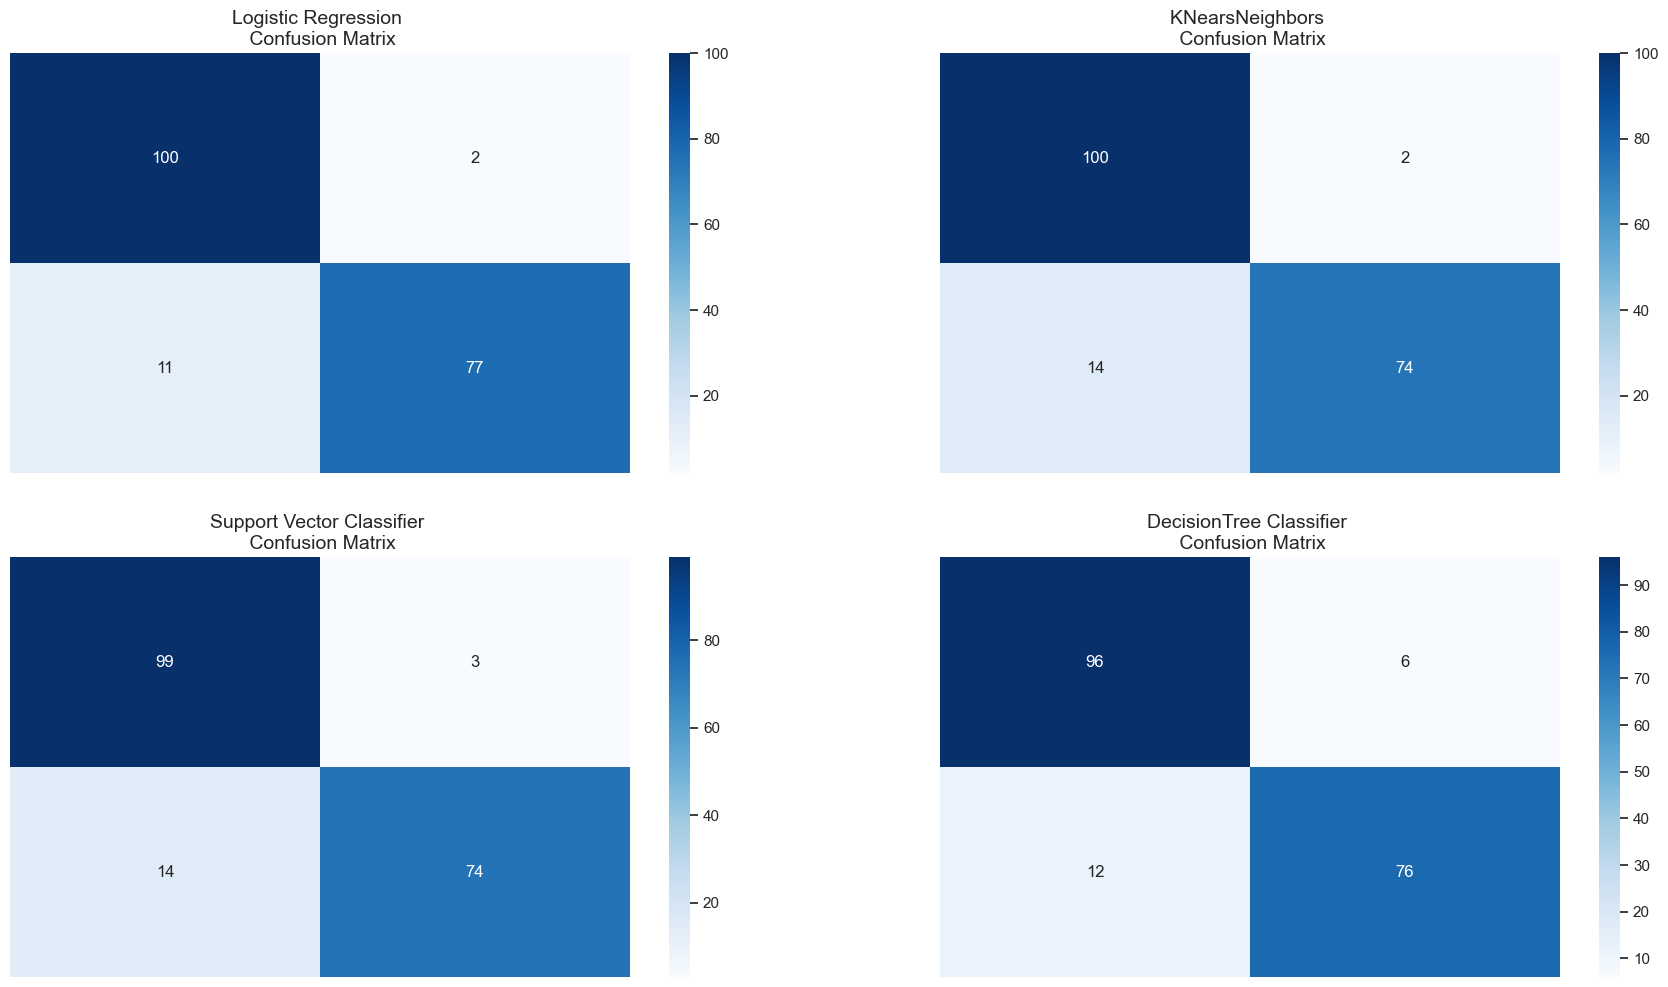

In [81]:
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2, figsize=(22, 12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.Blues, fmt='g')
ax[0][0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.Blues, fmt='g')
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.Blues, fmt='g')
ax[1][0].set_title("Support Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.Blues, fmt='g')
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()


In [82]:
# comparing various metrics across the data set

In [83]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       102
           1       0.97      0.88      0.92        88

    accuracy                           0.93       190
   macro avg       0.94      0.93      0.93       190
weighted avg       0.94      0.93      0.93       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       102
           1       0.97      0.84      0.90        88

    accuracy                           0.92       190
   macro avg       0.93      0.91      0.91       190
weighted avg       0.92      0.92      0.92       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       102
           1       0.96      0.84      0.90        88

    accuracy                           0.91       190
   macro avg       0.92      0.91      0.91       190
weighted

## 3.3. Neural Networks

### 3.3.1 Undersampling with Neural Networks 


In [86]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy as cat_cross_entropy

num_inputs = X_train.shape[1]

model = Sequential([
    Dense(num_inputs, input_shape=(num_inputs,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 32)                992       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1988 (7.77 KB)
Trainable params: 1988 (7.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [89]:
model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)


Epoch 1/20
25/25 - 1s - loss: 0.6282 - accuracy: 0.5778 - val_loss: 0.4710 - val_accuracy: 0.6513 - 785ms/epoch - 31ms/step
Epoch 2/20
25/25 - 0s - loss: 0.3983 - accuracy: 0.7616 - val_loss: 0.3582 - val_accuracy: 0.8553 - 25ms/epoch - 982us/step
Epoch 3/20
25/25 - 0s - loss: 0.3125 - accuracy: 0.8957 - val_loss: 0.2960 - val_accuracy: 0.9276 - 24ms/epoch - 966us/step
Epoch 4/20
25/25 - 0s - loss: 0.2572 - accuracy: 0.9288 - val_loss: 0.2555 - val_accuracy: 0.9408 - 24ms/epoch - 958us/step
Epoch 5/20
25/25 - 0s - loss: 0.2181 - accuracy: 0.9371 - val_loss: 0.2255 - val_accuracy: 0.9408 - 22ms/epoch - 871us/step
Epoch 6/20
25/25 - 0s - loss: 0.1887 - accuracy: 0.9404 - val_loss: 0.2035 - val_accuracy: 0.9342 - 60ms/epoch - 2ms/step
Epoch 7/20
25/25 - 0s - loss: 0.1639 - accuracy: 0.9503 - val_loss: 0.1907 - val_accuracy: 0.9342 - 21ms/epoch - 850us/step
Epoch 8/20
25/25 - 0s - loss: 0.1464 - accuracy: 0.9503 - val_loss: 0.1827 - val_accuracy: 0.9408 - 22ms/epoch - 898us/step
Epoch 9/20

In [91]:
predictions = model.predict(stratified_X_test, batch_size=200, verbose=0)


In [96]:
fraud_predictions = np.argmax(model.predict(stratified_X_test, batch_size=200, verbose=0), axis=-1)


In [123]:
predictions

array([[5.4751062e-03, 9.9452496e-01],
       [5.4685873e-01, 4.5314124e-01],
       [1.0000000e+00, 4.6824938e-15],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.8573423e-31],
       [1.0000000e+00, 4.1538332e-20]], dtype=float32)

In [98]:
import itertools

def plot_confusion_matrix(cm, labels,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    Plot confusion matrix.
    
    Parameters:
        cm (array-like): Confusion matrix.
        labels (list): List of class labels.
        normalize (bool): Whether to normalize the confusion matrix.
        title (str): Title of the plot.
        cmap: Colormap of the plot.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


Confusion matrix, without normalization
[[54960  1903]
 [    9    89]]


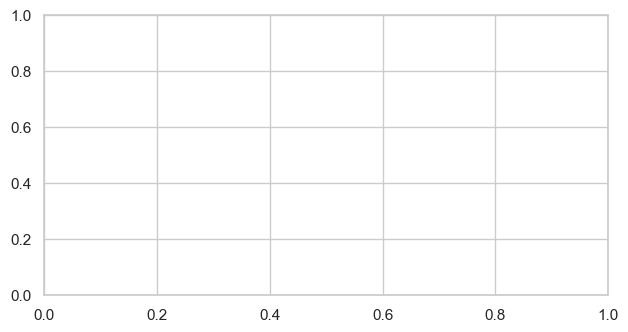

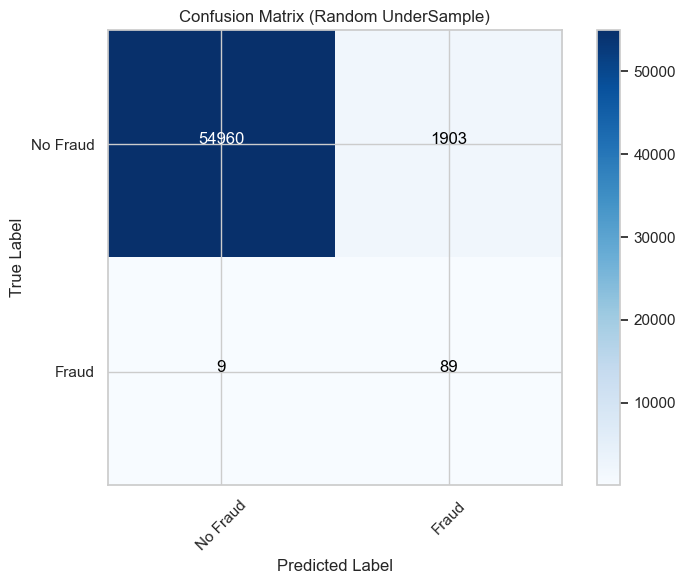

Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


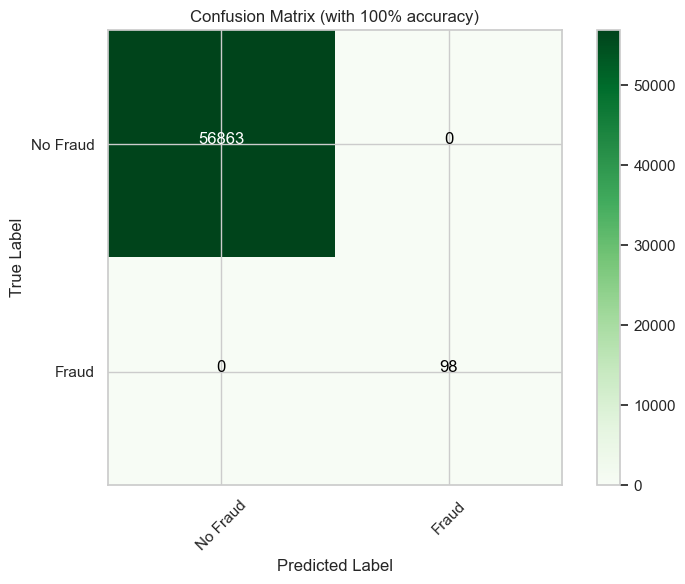

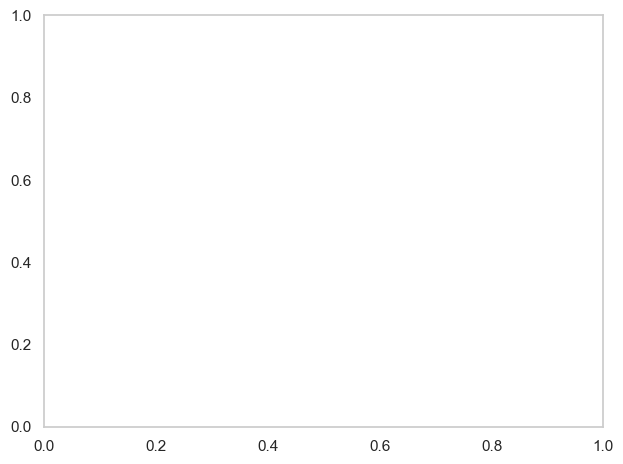

In [108]:
undersample_confusion_matrix = confusion_matrix(stratified_y_test, fraud_predictions)
actual_confusion_matrix = confusion_matrix(stratified_y_test, stratified_y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16, 8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_confusion_matrix, labels, title="Confusion Matrix (Random UnderSample)", cmap=plt.cm.Blues)


fig.add_subplot(222)
plot_confusion_matrix(actual_confusion_matrix, labels, title="Confusion Matrix (with 100% accuracy)", cmap=plt.cm.Greens)
plt.grid(False)

plt.tight_layout()
plt.show()


### 3.3.2.	Oversampling with Smote

In [113]:
input_shape = X_smote_train.shape[1]

model2 = Sequential([
    Dense(input_shape, input_shape=(input_shape,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


In [114]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [115]:
model2.fit(X_smote_train, y_smote_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)


Epoch 1/20
1214/1214 - 1s - loss: 0.0604 - accuracy: 0.9786 - val_loss: 0.0222 - val_accuracy: 0.9968 - 935ms/epoch - 770us/step
Epoch 2/20
1214/1214 - 1s - loss: 0.0128 - accuracy: 0.9971 - val_loss: 0.0054 - val_accuracy: 0.9998 - 605ms/epoch - 498us/step
Epoch 3/20
1214/1214 - 1s - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.0053 - val_accuracy: 0.9997 - 589ms/epoch - 486us/step
Epoch 4/20
1214/1214 - 1s - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0062 - val_accuracy: 0.9996 - 584ms/epoch - 481us/step
Epoch 5/20
1214/1214 - 1s - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0024 - val_accuracy: 1.0000 - 576ms/epoch - 475us/step
Epoch 6/20
1214/1214 - 1s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0016 - val_accuracy: 1.0000 - 584ms/epoch - 481us/step
Epoch 7/20
1214/1214 - 1s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 6.6299e-04 - val_accuracy: 1.0000 - 597ms/epoch - 492us/step
Epoch 8/20
1214/1214 - 1s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy

In [119]:
predictions2 = model2.predict(stratified_X_test, batch_size=200, verbose=0)


In [120]:
fraud_predictions2 = np.argmax(model2.predict(stratified_X_test, batch_size=200, verbose=0), axis=-1)


Confusion matrix, without normalization
[[56848    15]
 [   29    69]]


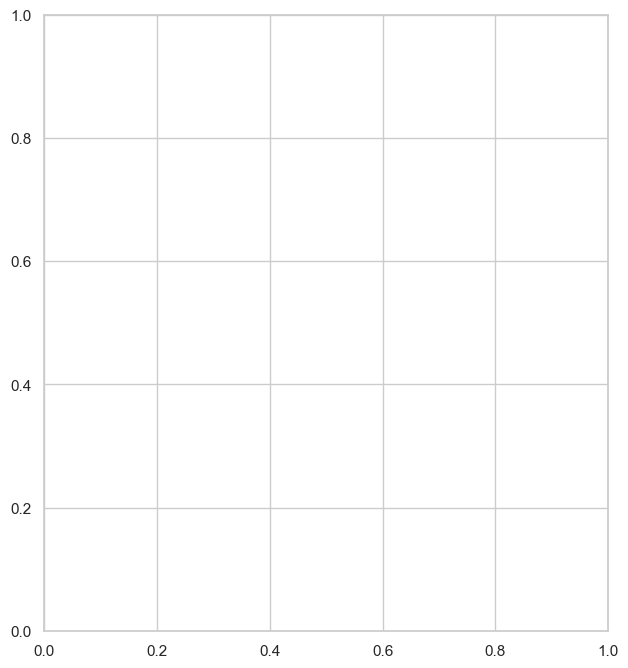

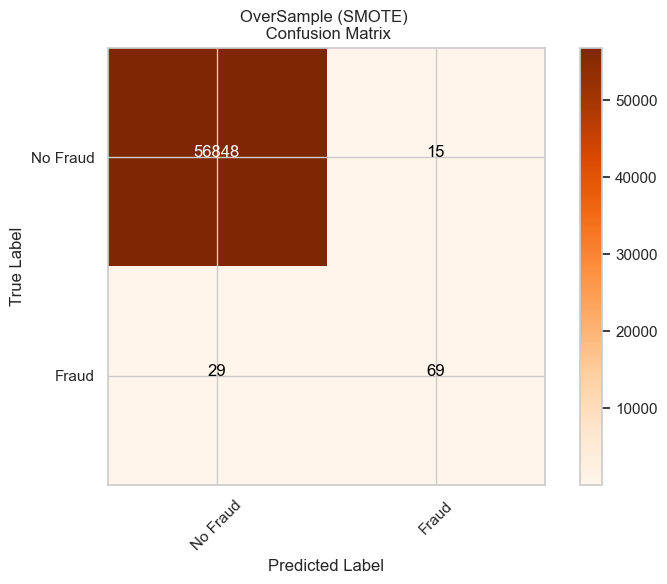

Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


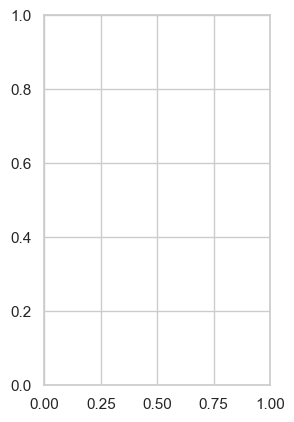

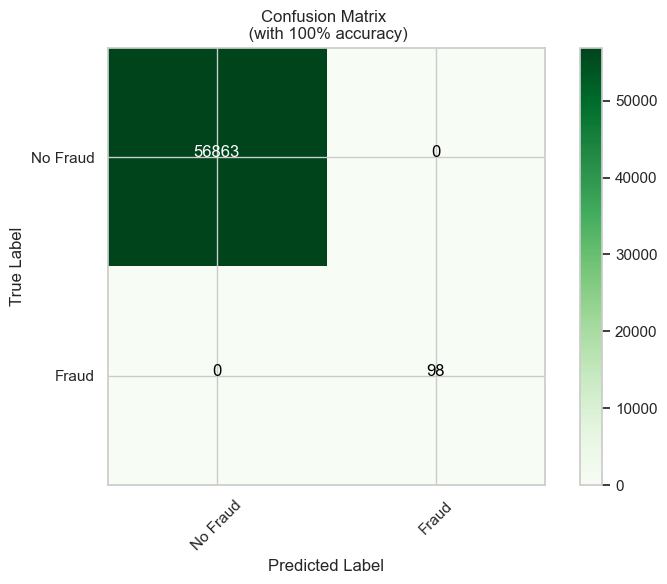

In [121]:
# Define confusion matrices
smote_cm = confusion_matrix(stratified_y_test, fraud_predictions2)
actual_cm = confusion_matrix(stratified_y_test, stratified_y_test)
labels = ['No Fraud', 'Fraud']

# Plot confusion matrices
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plot_confusion_matrix(smote_cm, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

plt.subplot(1, 2, 2)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.show()


In [124]:
# 5 Enesemble

In [129]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
xgb_model = xgb.XGBClassifier()
rf_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

# Train base models
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Bagging
bagging_xgb = BaggingClassifier(base_estimator=xgb_model, n_estimators=10, random_state=42)
bagging_rf = BaggingClassifier(base_estimator=rf_model, n_estimators=10, random_state=42)
bagging_ada = BaggingClassifier(base_estimator=ada_model, n_estimators=10, random_state=42)
bagging_gb = BaggingClassifier(base_estimator=gb_model, n_estimators=10, random_state=42)

# Train bagging models
bagging_xgb.fit(X_train, y_train)
bagging_rf.fit(X_train, y_train)
bagging_ada.fit(X_train, y_train)
bagging_gb.fit(X_train, y_train)

# Boosting
# Add more boosting models here if needed

# Evaluate models
def evaluate_model(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]  # Probability of positive class
    average_precision = average_precision_score(y, y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)
    return average_precision, auc

# Evaluate base models
xgb_ap, xgb_auc = evaluate_model(xgb_model, X_test, y_test)
rf_ap, rf_auc = evaluate_model(rf_model, X_test, y_test)
ada_ap, ada_auc = evaluate_model(ada_model, X_test, y_test)
gb_ap, gb_auc = evaluate_model(gb_model, X_test, y_test)

# Evaluate bagging models
bagging_xgb_ap, bagging_xgb_auc = evaluate_model(bagging_xgb, X_test, y_test)
bagging_rf_ap, bagging_rf_auc = evaluate_model(bagging_rf, X_test, y_test)
bagging_ada_ap, bagging_ada_auc = evaluate_model(bagging_ada, X_test, y_test)
bagging_gb_ap, bagging_gb_auc = evaluate_model(bagging_gb, X_test, y_test)

print("XGBoost - Average Precision:", xgb_ap, "AUC:", xgb_auc)
print("Random Forest - Average Precision:", rf_ap, "AUC:", rf_auc)
print("AdaBoost - Average Precision:", ada_ap, "AUC:", ada_auc)
print("Gradient Boosting - Average Precision:", gb_ap, "AUC:", gb_auc)

print("Bagging XGBoost - Average Precision:", bagging_xgb_ap, "AUC:", bagging_xgb_auc)
print("Bagging Random Forest - Average Precision:", bagging_rf_ap, "AUC:", bagging_rf_auc)
print("Bagging AdaBoost - Average Precision:", bagging_ada_ap, "AUC:", bagging_ada_auc)
print("Bagging Gradient Boosting - Average Precision:", bagging_gb_ap, "AUC:", bagging_gb_auc)


XGBoost - Average Precision: 0.9738647642551351 AUC: 0.9681372549019608
Random Forest - Average Precision: 0.9784785125680844 AUC: 0.9779411764705881
AdaBoost - Average Precision: 0.963834488258458 AUC: 0.9536541889483064
Gradient Boosting - Average Precision: 0.9730913985929429 AUC: 0.9694741532976827
Bagging XGBoost - Average Precision: 0.9778440457606584 AUC: 0.9753787878787878
Bagging Random Forest - Average Precision: 0.9759102373015563 AUC: 0.9747660427807486
Bagging AdaBoost - Average Precision: 0.9690523782092313 AUC: 0.9627896613190731
Bagging Gradient Boosting - Average Precision: 0.9734721278803776 AUC: 0.9710338680926915


In [130]:
# 6. AutoEnoders 

In [131]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define autoencoder model
def create_autoencoder(input_dim, hidden_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(hidden_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Train autoencoder
autoencoder = create_autoencoder(X_train.shape[1], 32)
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_split=0.2, verbose=0)

# Use autoencoder to encode data
X_train_encoded = autoencoder.predict(X_train)
X_test_encoded = autoencoder.predict(X_test)

# Calculate average precision and AUC
def calculate_metrics(y_true, y_pred):
    average_precision = tf.keras.metrics.AUC(curve='PR')(y_true, y_pred).numpy()
    auc = tf.keras.metrics.AUC()(y_true, y_pred).numpy()
    return average_precision, auc

# Calculate metrics for training data
train_average_precision, train_auc = calculate_metrics(X_train, X_train_encoded)

# Calculate metrics for test data
test_average_precision, test_auc = calculate_metrics(X_test, X_test_encoded)

print("Train Average Precision:", train_average_precision)
print("Train AUC:", train_auc)
print("Test Average Precision:", test_average_precision)
print("Test AUC:", test_auc)


6/6 [==============================] - 0s 1ms/step
Train Average Precision: 0.9999321
Train AUC: 0.21442744
Test Average Precision: 1.0000001
Test AUC: 0.0
